In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.3

In [2]:
with open(f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stall-score.df.pickle',"rb") as fr: stalling_score = pickle.load(fr)
stalling_score['AA_codon'] = stalling_score['aa-asite']+' '+stalling_score['codon-asite']
stalling_score = stalling_score.replace(0, np.nan).dropna()

display(stalling_score)

,transcript_id,asite,reltostart-asite,codon-asite,aa-asite,D0a,D0b,D0c,D4a,D4b,D4c,D8a,D8b,D8c,AA_codon
6,ENSMUST00000000001.5,195,54,AUC,I,1.876404,1.591739,5.703044,2.955752,0.824691,1.796907,3.290640,1.739583,2.312308,I AUC
7,ENSMUST00000000001.5,198,57,GAC,D,1.876404,1.591739,0.991834,0.268705,1.237037,0.673840,0.658128,1.159722,0.770769,D GAC
9,ENSMUST00000000001.5,204,63,AAC,N,3.987360,1.326450,4.711210,5.642800,0.824691,2.470746,0.658128,0.579861,1.027692,N AAC
10,ENSMUST00000000001.5,213,72,GAG,E,3.049157,2.652899,3.471418,2.149638,2.474074,2.695360,1.974384,2.899306,1.798462,E GAG
13,ENSMUST00000000001.5,228,87,GCG,A,1.641854,1.326450,4.711210,0.806114,0.824691,2.695360,2.303448,2.899306,5.652308,A GCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024950,ENSMUST00000239525.1,10109,9978,GAG,E,7.105894,12.158446,6.512629,5.410881,3.658754,4.345818,3.622268,7.712703,1.497849,E GAG
1024957,ENSMUST00000239525.1,10139,10008,GAG,E,15.544144,9.210944,7.598067,13.527202,9.146886,14.775780,5.433403,5.141802,1.497849,E GAG
1024966,ENSMUST00000239525.1,10184,10053,AAA,K,2.664710,2.210627,3.527674,13.527202,8.232198,5.214981,16.300208,10.283604,23.965577,K AAA
1025016,ENSMUST00000239525.1,10442,10311,GAG,E,1.776474,2.579064,0.542719,3.607254,0.304896,0.869164,3.622268,10.283604,1.497849,E GAG


In [3]:
data = pd.DataFrame(columns=list(set(stalling_score['AA_codon'])))

for SP in stalling_score.iloc[:,5:-1]:
    tmp = stalling_score.sort_values(SP, ascending=False)[:(len(stalling_score)//100)*5] # 5%
    data = pd.concat([data, pd.DataFrame(tmp.value_counts('AA_codon')).T.rename(index={0:SP})])

data = data.drop(columns=[colname for colname in data.columns if colname.startswith('*')]).T.replace(np.nan,0).sort_index().T

display(data)

,A GCA,A GCC,A GCG,A GCU,C UGC,C UGU,D GAC,D GAU,E GAA,E GAG,...,T ACC,T ACG,T ACU,V GUA,V GUC,V GUG,V GUU,W UGG,Y UAC,Y UAU
D0a,244,278,101,183,65,77,1279,967,1506,1526,...,124,67,97,95,169,312,117,439,254,133
D0b,217,305,113,182,62,74,1360,1004,1469,1541,...,123,60,102,100,166,283,86,385,276,134
D0c,249,253,112,204,49,58,1268,951,1540,1468,...,128,47,82,100,175,301,112,463,320,164
D4a,203,245,117,174,47,94,1255,854,4229,1634,...,87,54,94,61,146,233,62,451,168,124
D4b,253,274,122,191,52,96,1362,946,2204,1621,...,107,58,117,71,167,284,85,516,255,112
D4c,183,259,125,175,39,102,1296,921,3613,1720,...,86,52,87,59,133,223,67,462,210,126
D8a,154,228,95,156,38,94,1504,1018,3555,1819,...,82,42,103,53,136,213,62,467,170,188
D8b,174,236,101,158,34,80,1439,983,4050,1938,...,89,38,88,49,139,200,64,419,155,143
D8c,118,170,81,115,17,105,1312,1101,5389,1864,...,68,31,102,34,104,133,48,442,134,270


In [4]:
data_z = data.copy()
for codon in data_z:
    data_z[codon] = (data[codon] - data[codon].mean()) / data[codon].std(ddof=1) # ddof=1 : sample std

display(data_z)

,A GCA,A GCC,A GCG,A GCU,C UGC,C UGU,D GAC,D GAU,E GAA,E GAG,...,T ACC,T ACG,T ACU,V GUA,V GUC,V GUG,V GUU,W UGG,Y UAC,Y UAU
D0a,0.959621,0.741806,-0.455659,0.47014,1.368228,-0.62958,-0.746309,-0.068099,-1.089484,-0.947055,...,1.13658,1.492948,0.01047,1.07418,0.897279,1.20281,1.636269,-0.28762,0.601705,-0.447799
D0b,0.378105,1.451486,0.39281,0.431321,1.165249,-0.824967,0.218335,0.471831,-1.115396,-0.855535,...,1.090502,0.882197,0.481642,1.28164,0.767029,0.701319,0.331929,-1.790668,0.948035,-0.427341
D0c,1.067309,0.084694,0.322104,1.285337,0.285674,-1.86703,-0.877311,-0.301583,-1.065672,-1.300929,...,1.32089,-0.252056,-1.403045,1.28164,1.15778,1.012589,1.425892,0.380401,1.640696,0.186393
D4a,0.076578,-0.125581,0.675633,0.12077,0.150355,0.477612,-1.03213,-1.717076,0.817521,-0.288116,...,-0.56829,0.358695,-0.272233,-0.336546,-0.101306,-0.163321,-0.677883,0.04639,-0.752131,-0.631919
D4b,1.15346,0.636668,1.029162,0.780691,0.488653,0.60787,0.242154,-0.374546,-0.600652,-0.367433,...,0.353261,0.707696,1.895158,0.078374,0.810446,0.718611,0.289853,1.855614,0.617447,-0.877413
D4c,-0.354174,0.242401,1.241279,0.159589,-0.390922,0.998644,-0.543853,-0.739364,0.386117,0.236594,...,-0.614368,0.184195,-0.931873,-0.41953,-0.665723,-0.336249,-0.467505,0.352567,-0.090955,-0.591003
D8a,-0.978766,-0.572417,-0.879894,-0.57797,-0.458582,0.477612,1.933259,0.676129,0.345497,0.840621,...,-0.798678,-0.688307,0.575877,-0.668481,-0.535473,-0.509177,-0.677883,0.491738,-0.720647,0.677381
D8b,-0.548013,-0.362141,-0.455659,-0.500332,-0.72922,-0.434193,1.159161,0.165384,0.692162,1.566674,...,-0.476135,-1.037308,-0.837639,-0.834449,-0.405223,-0.733983,-0.593732,-0.844304,-0.956781,-0.243221
D8c,-1.754121,-2.096916,-1.869775,-2.169545,-1.879434,1.194031,-0.353306,1.887324,1.629907,1.115179,...,-1.443764,-1.64806,0.481642,-1.456828,-1.924809,-1.8926,-1.26694,-0.204118,-1.287369,2.354921


In [5]:
tmp_data = data_z.copy().T
corr = 1 - tmp_data.T.astype('float64').corr() 
corr = corr.replace(np.nan, 0)
condensedData = squareform(corr)
link = sch.linkage(condensedData, method='ward')
link = np.clip(link,0,None) # remove negative value by float point inaccuracy
with plt.rc_context({'lines.linewidth': 0.3}):
    dendrogram = sch.dendrogram(link, no_plot=True)

tmp_data = tmp_data.iloc[dendrogram['leaves']]

P_data = tmp_data

display(P_data)

,D0a,D0b,D0c,D4a,D4b,D4c,D8a,D8b,D8c
S AGU,0.115087,1.265958,-0.575435,0.115087,-1.035784,1.035784,-1.496132,-0.575435,1.150871
I AUA,-0.2234,-1.506759,-0.501461,-0.244789,-0.950636,0.375501,0.760509,0.396891,1.894143
K AAA,-1.167672,-0.477054,-0.643468,-0.510336,-0.535299,0.15532,0.621279,0.338375,2.218854
Y UAU,-0.447799,-0.427341,0.186393,-0.631919,-0.877413,-0.591003,0.677381,-0.243221,2.354921
C UGU,-0.62958,-0.824967,-1.86703,0.477612,0.60787,0.998644,0.477612,-0.434193,1.194031
...,...,...,...,...,...,...,...,...,...
R AGA,0.213073,-0.778817,0.742081,0.213073,0.609829,1.40334,0.477577,-1.572329,-1.307825
W UGG,-0.28762,-1.790668,0.380401,0.04639,1.855614,0.352567,0.491738,-0.844304,-0.204118
N AAC,0.057971,-0.687371,0.728778,-0.165631,1.399586,-0.501035,-0.724638,1.399586,-1.507246
A GCG,-0.455659,0.39281,0.322104,0.675633,1.029162,1.241279,-0.879894,-0.455659,-1.869775


In [6]:
P_data2 = data.T.copy()
P_data2 = P_data2.reindex(P_data.index)

display(P_data2.sort_values('D8c', ascending=False))

,D0a,D0b,D0c,D4a,D4b,D4c,D8a,D8b,D8c
E GAA,1506,1469,1540,4229,2204,3613,3555,4050,5389
E GAG,1526,1541,1468,1634,1621,1720,1819,1938,1864
D GAC,1279,1360,1268,1255,1362,1296,1504,1439,1312
D GAU,967,1004,951,854,946,921,1018,983,1101
K AAA,275,358,338,354,351,434,490,456,682
...,...,...,...,...,...,...,...,...,...
R CGU,60,54,56,47,49,46,55,41,36
V GUA,95,100,100,61,71,59,53,49,34
T ACG,67,60,47,54,58,52,42,38,31
F UUC,76,96,88,34,76,51,47,38,27


In [7]:
# reverse
P_data = P_data[::-1]
P_data2 = P_data2[::-1]

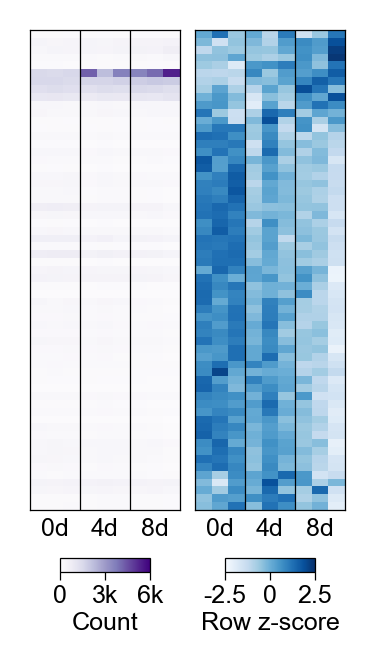

<Figure size 640x480 with 0 Axes>

In [13]:
sF = 1 # Size factor
wgap = 0.05
hgap = 0
nrow, ncol = 1, 2

width_ratios = [0.5, 0.5]
height_ratios = [1.6]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)


# count
ax = fig.add_subplot(grid[0,0])

plot_data2 = P_data2.astype('float64')
heat = ax.imshow(plot_data2, 
                 cmap='Purples', vmin=0, vmax=6000, 
                 interpolation='none', aspect='auto', rasterized=True)
ax.axvline(2.5, c='k', lw=0.3)
ax.axvline(5.5, c='k', lw=0.3)

ax.set_xticks([1,4,7])
ax.set_yticks([])
ax.set_xticklabels(['0d','4d','8d'])
ax.tick_params(axis='x', length=0, pad=2)
ax.yaxis.set_inverted(inverted=False)

cbar = plt.colorbar(heat, ax=ax, cax = ax.inset_axes([0.2, -0.13, 0.6, 0.03]), orientation='horizontal')
cbar.ax.set_xticks([0, 3000, 6000])
cbar.ax.set_xticklabels(['0', '3k', '6k'])
cbar.ax.tick_params(width=0.3, length=2, pad=1)
cbar.ax.set_xlabel('Count', fontsize=6, labelpad=1)


# row z-score
ax = fig.add_subplot(grid[0,1])

plot_data1 = P_data.astype('float64')
heat = ax.imshow(plot_data1, 
                 cmap='Blues', vmin=-2.5, vmax=2.5, 
                 interpolation='none', aspect='auto', rasterized=True)
ax.axvline(2.5, c='k', lw=0.3)
ax.axvline(5.5, c='k', lw=0.3)

ax.set_xticks([1,4,7])
ax.set_yticks([])
ax.set_xticklabels(['0d','4d','8d'])
ax.tick_params(axis='x', length=0, pad=2)
ax.yaxis.set_inverted(inverted=False)

cbar = plt.colorbar(heat, ax=ax, cax = ax.inset_axes([0.2, -0.13, 0.6, 0.03]), orientation='horizontal')
cbar.ax.set_xticks([-2.5,0,2.5])
cbar.ax.set_xticklabels([-2.5,0,2.5])
cbar.ax.tick_params(width=0.3, length=2, pad=1)
cbar.ax.set_xlabel('Row z-score', fontsize=6, labelpad=1)


plt.savefig('adi_top5pct_stalling-score_codon-count-z_heatmap.pdf', bbox_inches='tight')
plt.show()
plt.clf()